# Chapter 3: Finding Top Words

Dear user, now that the data collected is clean, \
we can split the chunks of text into words to find the most mentioned words.

### REQUIREMENTS

For this notebook, you need to have:
- 5 x Pickle files of Scraped data from Online sources (from Chap2.ipynb)

### TO DO SECTION

In [40]:
'''
Dear user, enter your Product here!
'''

product = "Boeing 787 Dreamliner Commercial Plane"

In [41]:
'''
Dear user, enter your 5 Online sources and \
directories to the 5 Pickle files of Scraped data here!
'''
sources = ['youtube', 'reddit', 'wikipedia', 'brochure', 'textbook']       # In sequence from source 1 to source 5

source1_dir = f"support/{product}/{sources[0]}/comment_list.pkl"
source2_dir = f"support/{product}/{sources[1]}/comment_list.pkl"
source3_dir = f"support/{product}/{sources[2]}/{sources[2]}.pkl"
source4_dir = f"support/{product}/{sources[3]}/{sources[3]}.pkl"
source5_dir = f"support/{product}/{sources[4]}/{sources[4]}.pkl"

In [42]:
'''
Dear user, please replace [Ctrl-F] the variable names and following variable names with the 5 Online sources used (in the same format)!
'''
youtube_comment_list = None
all_youtube_comments = None

reddit_comment_list = None
all_reddit_comments = None

wikipedia = None

brochure = None

textbook = None

### RUN AS INTENDED (DO NOT CHANGE ANYTHING.)

##### Set Up

In [43]:
""" Initialise and Establish Dataset """
import pandas as pd

search_terms = product

youtube_comment_list = pd.read_pickle(source1_dir)

reddit_comment_list = pd.read_pickle(source2_dir)

wikipedia = pd.read_pickle(source3_dir)

brochure = pd.read_pickle(source4_dir)

textbook = pd.read_pickle(source5_dir)

## Splitting Text Chunk into Words

In [44]:
""" Join all Comments into a corpus (only for Comments)"""
def combine_text(list_of_text):                     # define combine_text to take (list_of_text)
    combined_text = ' '.join(list_of_text)          # do this
    return combined_text                            # and give combined_text back

In [45]:
print("Joining youtube comments...")
all_youtube_comments = combine_text(youtube_comment_list)
print(all_youtube_comments)
print()
print("Joining reddit comments...")
all_reddit_comments = combine_text(reddit_comment_list)
print(all_reddit_comments)

Joining youtube comments...
yes    be free when you become a pilot   beautiful livery i love vietnam boeing has sold more than 700 of these bad boys  gorgeous and what wings super i wish i could make a barrel  what is there music  this plane is sick i have travelled from chicago to warsaw and had the best flying experience love the 787 dreamliner  im vietnamese so do not dislike m3 plz it is a beautiful airplane  the boeing dreamliner programme announced in 2003 was supposed to cost dollar6 billion and see the plane take to the air in 2008 the final bill was dollar32 billion and the 787 dreamliner arrived three years late boeing is the past and airbus is the future  wonderful video beautiful aircraft congratulations to the creators there was a mechanical failure while retracting the landing gear i have been on 787 8 amazing experience awesome aircraft nylon eyokbc  lkkk kkkjjjjhhgggffs nn well he is not loaded fake great  it is like fish like dolghine the bravest people the last twenty

In [46]:
""" Remove stopwords and Split """
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def proper_split(text):
    all_text = " ".join(word for word in text.split() if word not in stopwords)
    print(all_text)
    return all_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
print("Split youtube comments:")
all_youtube_comments = proper_split(all_youtube_comments)
print()
print("Split reddit comments:")
all_reddit_comments = proper_split(all_reddit_comments)
print()
print("Split wikipedia:")
wikipedia = proper_split(wikipedia)
print()
print("Split brochure:")
brochure = proper_split(brochure)
print()
print("Split textbook:")
textbook = proper_split(textbook)

Split youtube comments:
yes free become pilot beautiful livery love vietnam boeing sold 700 bad boys gorgeous wings super wish could make barrel music plane sick travelled chicago warsaw best flying experience love 787 dreamliner im vietnamese dislike m3 plz beautiful airplane boeing dreamliner programme announced 2003 supposed cost dollar6 billion see plane take air 2008 final bill dollar32 billion 787 dreamliner arrived three years late boeing past airbus future wonderful video beautiful aircraft congratulations creators mechanical failure retracting landing gear 787 8 amazing experience awesome aircraft nylon eyokbc lkkk kkkjjjjhhgggffs nn well loaded fake great like fish like dolghine bravest people last twenty years looked forward flying sort distance recently took flight seattle tokyo ana 787 dream liner ten hour flight pure joy aircraft absolutely beautiful clean lines beautiful interior along individual tv monitors pull arm rests lucky enough exit seat plenty leg room service e

## Graph Visualisation of Top Words

In [48]:
""" Find and Plot top words """
import pickle
from collections import Counter
from nltk.util import everygrams
import matplotlib.pyplot as plt
from matplotlib import style

def find_top_words(all_text, file):
    top_length = 3                # top_length > 1 not useful after removing stopwords
    num_top = 30

    e_grams_counts = Counter(everygrams(all_text.split(), max_len=top_length))
    e_grams_most = e_grams_counts.most_common(num_top)
    print(e_grams_most)
    top_word = e_grams_most[0][0][0]
    print("Top Word:", top_word)
    top_word_count = e_grams_most[0][1]
    print("Top Word Count:", top_word_count)
    print("Number of e-grams found:", len(e_grams_most))
    pickle.dump(e_grams_most, open("support/%s/%s/e_grams_most.pkl" % (search_terms, file), "wb"))

    style.use("ggplot")
    x = []
    y = []
    for i in range(len(e_grams_most)):
        x.append(e_grams_most[i][0][0])       # assume 1 word
        y.append(e_grams_most[i][1])
    fig = plt.figure(figsize=(8, 6))
    plt.bar(x, y, color='r')
    plt.title(f'Top Words Found ({file})')
    plt.ylabel('Number of times')
    plt.xlabel('Words')
    plt.xticks(rotation=70, fontsize=8)
    plt.savefig("support/%s/%s/data_words.png" % (search_terms, file), bbox_inches='tight')
    plt.show()

--- TOP WORDS SUMMARY ---
Youtube comments:
[(('boeing',), 810), (('video',), 684), (('787',), 627), (('like',), 528), (('plane',), 487), (('would',), 390), (('one',), 349), (('aircraft',), 348), (('great',), 297), (('engineering',), 283), (('amazing',), 279), (('beautiful',), 240), (('love',), 229), (('take',), 222), (('fly',), 201), (('carbon',), 200), (('see',), 198), (('much',), 192), (('airbus',), 180), (('flight',), 180), (('really',), 180), (('planes',), 180), (('air',), 176), (('know',), 174), (('well',), 170), (('good',), 170), (('insane',), 167), (('get',), 164), (('a350',), 164), (('wow',), 158)]
Top Word: boeing
Top Word Count: 810
Number of e-grams found: 30


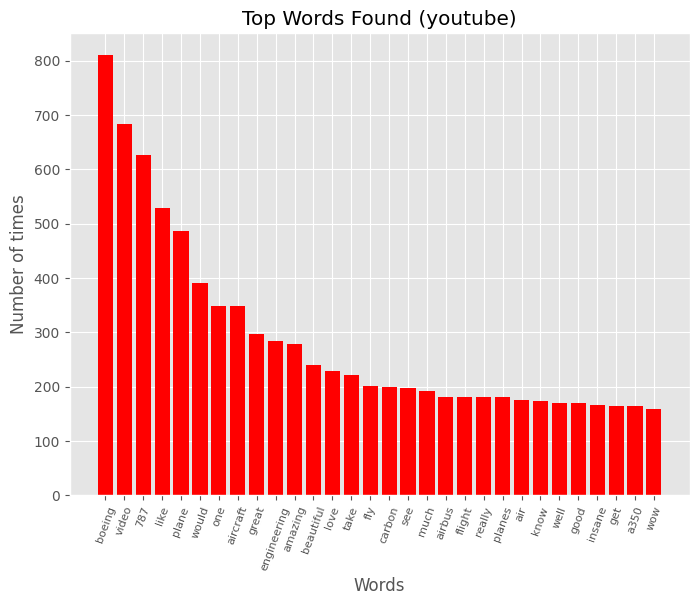


Reddit comments:
[(('like',), 334), (('would',), 320), (('plane',), 239), (('one',), 225), (('787',), 217), (('boeing',), 215), (('flight',), 205), (('get',), 152), (('much',), 151), (('aircraft',), 139), (('also',), 138), (('know',), 136), (('air',), 134), (('think',), 131), (('pilot',), 130), (('time',), 119), (('still',), 119), (('could',), 118), (('see',), 116), (('really',), 116), (('engine',), 115), (('even',), 112), (('going',), 110), (('right',), 106), (('speed',), 105), (('fly',), 103), (('people',), 102), (('make',), 98), (('planes',), 95), (('way',), 93)]
Top Word: like
Top Word Count: 334
Number of e-grams found: 30


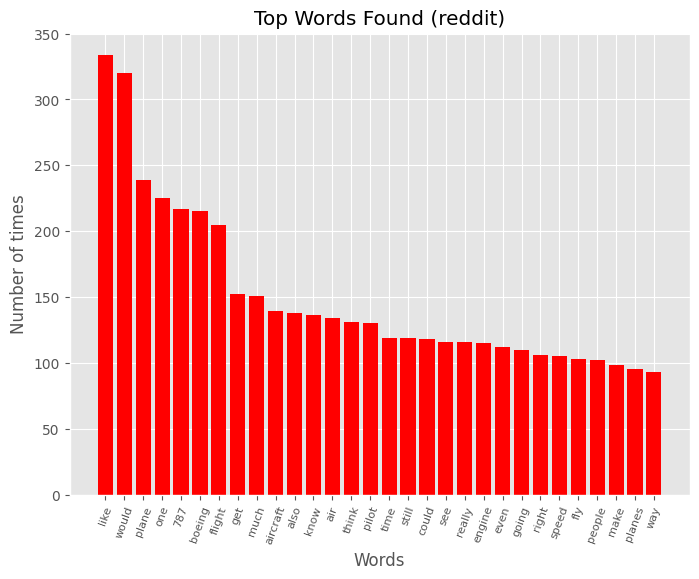


wikipedia:
[(('787',), 629), (('boeing',), 609), (('retrieved',), 286), (('2013',), 202), (('january',), 183), (('flight',), 168), (('boeing', '787'), 147), (('9',), 143), (('8',), 136), (('dreamliner',), 128), (('aircraft',), 125), (('10',), 125), (('first',), 122), (('2011',), 121), (('september',), 121), (('2',), 103), (('original',), 103), (('archived',), 103), (('december',), 102), (('archived', 'original'), 97), (('2010',), 95), (('july',), 94), (('march',), 91), (('2014',), 80), (('air',), 79), (('faa',), 78), (('april',), 77), (('new',), 77), (('november',), 77), (('1',), 76)]
Top Word: 787
Top Word Count: 629
Number of e-grams found: 30


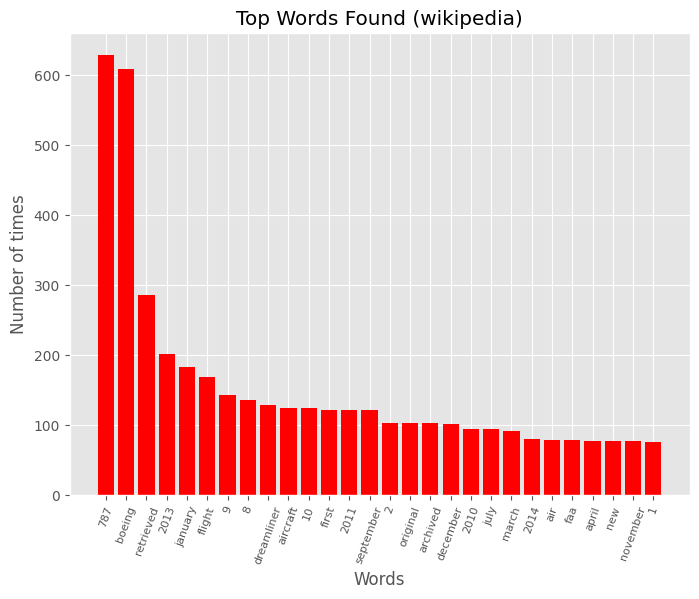


brochure:
[(('787',), 444), (('3',), 377), (('2023',), 374), (('5',), 333), (('model',), 319), (('2',), 313), (('model', '787'), 312), (('1',), 289), (('6',), 264), (('7',), 264), (('4',), 253), (('9',), 252), (('8',), 229), (('boeing',), 204), (('10',), 197), (('subject',), 190), (('february',), 188), (('d6',), 187), (('d6', '58333'), 187), (('58333',), 187), (('rev',), 187), (('february', '2023'), 187), (('ear',), 187), (('itar',), 187), (('copyright',), 187), (('copyright', '2023'), 187), (('copyright', '2023', 'boeing'), 187), (('2023', 'boeing'), 187), (('2023', 'boeing', 'rights'), 187), (('boeing', 'rights'), 187)]
Top Word: 787
Top Word Count: 444
Number of e-grams found: 30


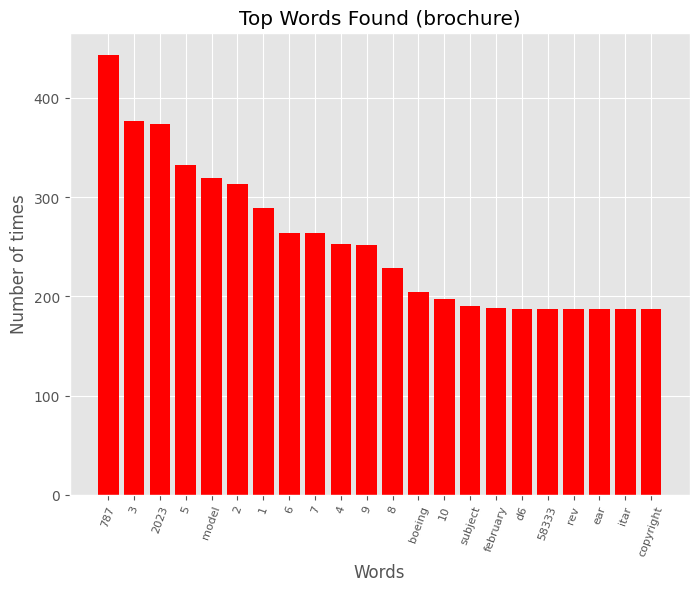


textbook:
[(('aircraft',), 1785), (('0',), 840), (('wing',), 678), (('design',), 652), (('engine',), 564), (('1',), 530), (('fig',), 431), (('e',), 427), (('mass',), 414), (('fuel',), 414), (('2',), 395), (('3',), 372), (('take',), 367), (('5',), 361), (('weight',), 347), (('fuselage',), 343), (('ratio',), 325), (('cost',), 317), (('thrust',), 312), (('10',), 308), (('cruise',), 307), (('drag',), 306), (('maximum',), 296), (('may',), 288), (('range',), 275), (('shown',), 268), (('flight',), 253), (('used',), 252), (('4',), 248), (('climb',), 246)]
Top Word: aircraft
Top Word Count: 1785
Number of e-grams found: 30


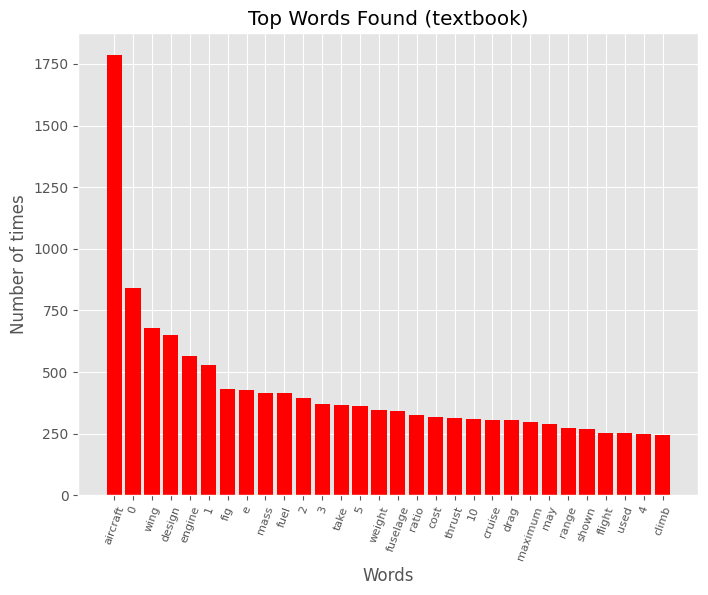

In [49]:
print("--- TOP WORDS SUMMARY ---")
print("Youtube comments:")
find_top_words(all_youtube_comments, "youtube")
print()
print("Reddit comments:")
find_top_words(all_reddit_comments, "reddit")
print()
print("wikipedia:")
find_top_words(wikipedia, "wikipedia")
print()
print("brochure:")
find_top_words(brochure, "brochure")
print()
print("textbook:")
find_top_words(textbook, "textbook")

## WordCloud Visualisation of Top Words

In [50]:
""" Generate WordCloud """
def generate_wordcloud(all_text, file):
    from wordcloud import WordCloud, STOPWORDS
    STOPWORDS.update(stopwords)

    wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2", collocations=False,
                max_font_size=150, include_numbers=True, random_state=42, max_words=50)

    wc.generate(all_text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("%s (%s)" % (search_terms, file), fontsize=10)
    plt.savefig("support/%s/%s/WordCloud.png" % (search_terms, file))
    plt.show()

--- WORD CLOUD SUMMARY ---
youtube comments:


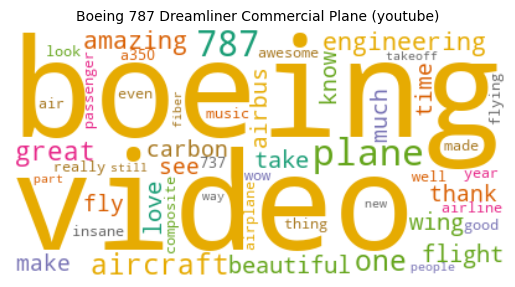


reddit comments:


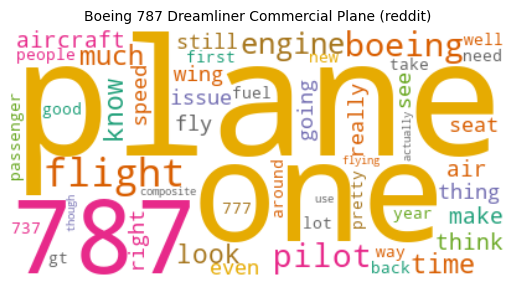


wikipedia:


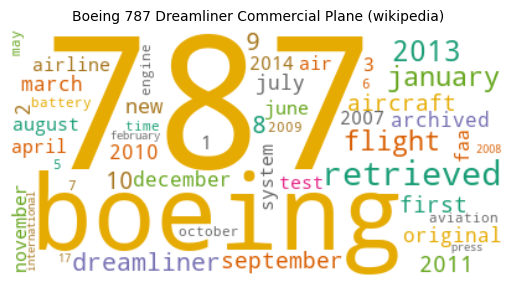


brochure:


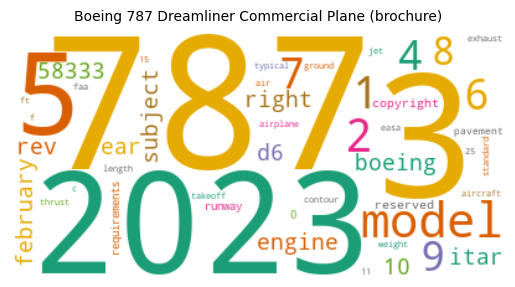


textbook:


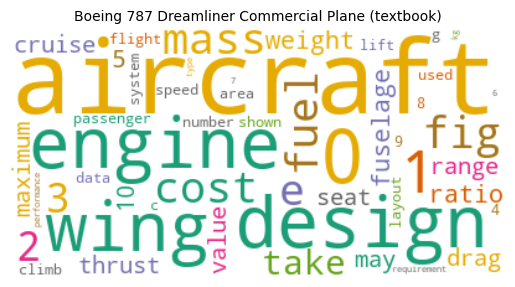

In [51]:
print("--- WORD CLOUD SUMMARY ---")
print("youtube comments:")
generate_wordcloud(all_youtube_comments, "youtube")
print()
print("reddit comments:")
generate_wordcloud(all_reddit_comments, "reddit")
print()
print("wikipedia:")
generate_wordcloud(wikipedia, "wikipedia")
print()
print("brochure:")
generate_wordcloud(brochure, "brochure")
print()
print("textbook:")
generate_wordcloud(textbook, "textbook")